In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\ussrey bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_ussrey.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81,1
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57,1
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,1
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26,1
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-6.78,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-6.57,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-9.69,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-6.78,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-6.78,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-6.57,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-9.69,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-6.78,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-6.78,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57
14665,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-6.57,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51
14666,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-5.37,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57
14667,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-3.82,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-10.51,-3.82,-6.57,-9.81,-6.57,-6.57,-5.37,-5.37,-3.82,...,-14.59,-8.26,-9.69,-8.26,-8.26,-9.81,-5.37,-6.78,-10.51,0
1,-8.26,-9.81,-6.78,-9.81,-5.37,-6.78,-8.26,-9.81,-5.37,-10.51,...,-14.59,-8.26,-9.69,-14.59,-6.57,-6.57,-3.82,-10.51,-9.69,0
2,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,-10.51,-6.57,-5.37,-10.51,...,-5.37,-10.51,-6.57,-6.78,-14.59,-6.78,-5.37,-6.57,-9.81,0
3,-10.51,-6.57,-9.81,-5.37,-6.57,-5.37,-5.37,-6.57,-10.51,-5.37,...,-14.59,-6.78,-6.57,-14.59,-6.78,-5.37,-5.37,-3.82,-5.37,0
4,-5.37,-5.37,-6.78,-9.81,-10.51,-9.69,-14.59,-6.78,-9.81,-6.78,...,-9.81,-6.78,-6.57,-9.81,-6.57,-6.57,-9.81,-6.57,-3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57,0
14665,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51,0
14666,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57,0
14667,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-8.101757
1,-79,-8.124299
2,-78,-8.163010
3,-77,-8.136524
4,-76,-8.138863
...,...,...
94,14,-7.983544
95,15,-8.022828
96,16,-8.046257
97,17,-8.025855


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-8.376394,150
1,-79,-8.345650,151
2,-78,-8.354927,152
3,-77,-8.428811,153
4,-76,-8.355195,154
...,...,...,...
94,14,-8.425919,244
95,15,-8.373127,245
96,16,-8.427213,246
97,17,-8.438258,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


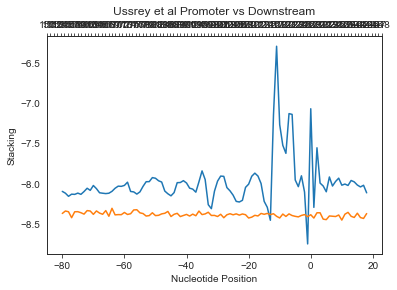

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ussrey et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-6.57,-10.51,-6.57,-10.51,-5.37,-5.37,-9.81,-8.26,-6.78,...,-9.81,-8.26,-9.69,-10.51,-5.37,-3.82,-6.78,-8.26,-9.81,1
1,-6.78,-9.81,-8.26,-6.57,-5.37,-5.37,-6.57,-9.81,-6.57,-5.37,...,-6.78,-9.81,-5.37,-10.51,-6.57,-10.51,-6.57,-5.37,-6.57,1
2,-3.82,-6.57,-5.37,-6.57,-10.51,-6.57,-9.81,-5.37,-5.37,-6.78,...,-9.69,-8.26,-9.81,-6.57,-6.57,-10.51,-5.37,-5.37,-6.57,1
3,-6.78,-14.59,-9.69,-8.26,-9.81,-5.37,-6.57,-5.37,-5.37,-3.82,...,-9.81,-6.57,-6.57,-6.57,-8.26,-9.81,-6.78,-14.59,-8.26,1
4,-3.82,-5.37,-6.57,-5.37,-9.81,-6.78,-5.37,-3.82,-10.51,-6.57,...,-9.69,-9.81,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-5.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-6.57,-5.37,-6.57,-14.59,-6.78,-6.57,-8.26,-10.51,-5.37,-6.57,...,-9.81,-6.78,-10.51,-5.37,-6.57,-14.59,-8.26,-8.26,-6.57,0
29334,-9.81,-5.37,-6.78,-10.51,-9.81,-6.57,-10.51,-8.26,-6.57,-6.78,...,-5.37,-3.82,-10.51,-6.78,-9.81,-8.26,-6.78,-3.82,-10.51,0
29335,-5.37,-5.37,-5.37,-5.37,-6.57,-8.26,-14.59,-9.69,-10.51,-3.82,...,-3.82,-6.78,-9.81,-10.51,-6.57,-6.78,-10.51,-5.37,-6.57,0
29336,-9.69,-9.81,-5.37,-6.57,-6.57,-8.26,-9.81,-5.37,-6.78,-9.81,...,-6.57,-5.37,-5.37,-5.37,-5.37,-3.82,-10.51,-6.57,-10.51,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.7941376959781867, Precision: 0.791867677463818, Recall: 0.791867677463818, F1 Score: 0.791867677463818, MCC: 0.5882264097632112, Specificity: 0.7963587322993931
Fold 2: Accuracy: 0.7958418541240627, Precision: 0.7980066445182724, Recall: 0.8028074866310161, F1 Score: 0.8003998667110963, MCC: 0.5914856610792222, Specificity: 0.7885952712100139
Fold 3: Accuracy: 0.8043626448534424, Precision: 0.819327731092437, Recall: 0.7873485868102288, F1 Score: 0.8030199039121483, MCC: 0.609336060394022, Specificity: 0.8218232044198895
Fold 4: Accuracy: 0.8023176550783913, Precision: 0.8053221288515406, Recall: 0.7920110192837465, F1 Score: 0.798611111111111, MCC: 0.6046087696483939, Specificity: 0.8124156545209177
Fold 5: Accuracy: 0.8067484662576687, Precision: 0.8105482303955587, Recall: 0.79890560875513, F1 Score: 0.8046848088184636, MCC: 0.6135364567325791, Specificity: 0.8145380434782609
Fold 6: Accuracy: 0.7948193592365371, Precision: 0.7998656816655474, Recall: 0.796655518

In [30]:
accuracy_list

[0.7941376959781867,
 0.7958418541240627,
 0.8043626448534424,
 0.8023176550783913,
 0.8067484662576687,
 0.7948193592365371,
 0.7961826857532379,
 0.7948193592365371,
 0.8025912035458574,
 0.7896351858165701]

In [31]:
precision_list

[0.791867677463818,
 0.7980066445182724,
 0.819327731092437,
 0.8053221288515406,
 0.8105482303955587,
 0.7998656816655474,
 0.7834351663272233,
 0.7855227882037533,
 0.8164422395464209,
 0.7884745762711864]

In [32]:
recall_list

[0.791867677463818,
 0.8028074866310161,
 0.7873485868102288,
 0.7920110192837465,
 0.79890560875513,
 0.7966555183946489,
 0.8053035589672016,
 0.8060522696011004,
 0.782608695652174,
 0.7922343324250681]

In [33]:
specificity_list

[0.7963587322993931,
 0.7885952712100139,
 0.8218232044198895,
 0.8124156545209177,
 0.8145380434782609,
 0.792911744266852,
 0.787475016655563,
 0.7837837837837838,
 0.8227241615331964,
 0.7870307167235495]

In [34]:
f1_score_list 

[0.791867677463818,
 0.8003998667110963,
 0.8030199039121483,
 0.798611111111111,
 0.8046848088184636,
 0.7982573726541556,
 0.7942188575361321,
 0.7956551255940258,
 0.7991675338189386,
 0.7903499830105334]

In [35]:
mcc_list

[0.5882264097632112,
 0.5914856610792222,
 0.609336060394022,
 0.6046087696483939,
 0.6135364567325791,
 0.5895261593120209,
 0.5926243046992191,
 0.589898557565792,
 0.605762560108517,
 0.57927447655637]

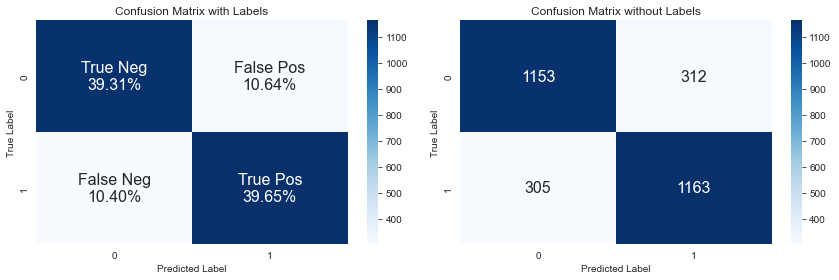

In [36]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [37]:
print(mean(accuracy_list))

0.7981456109880491


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


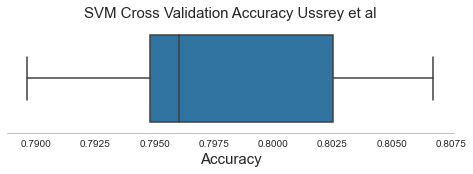

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Ussrey et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [39]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.7896351858165701
Precision: 0.7884745762711864
Recall: 0.7922343324250681
f1_score: 0.7903499830105334


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


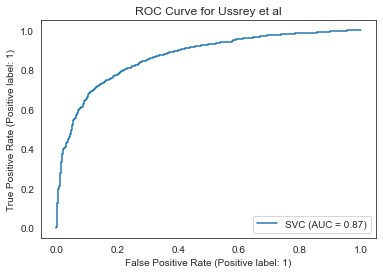

In [40]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ussrey et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


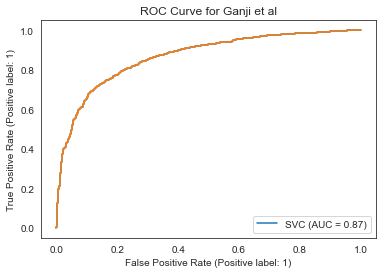

In [41]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_ussrey_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

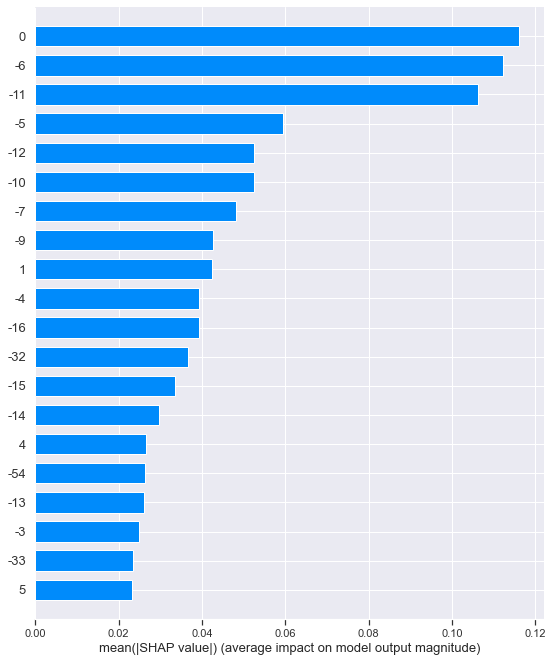

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

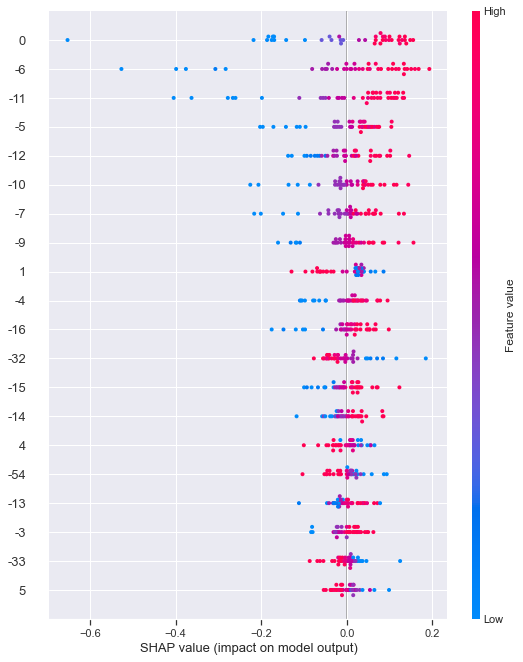

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

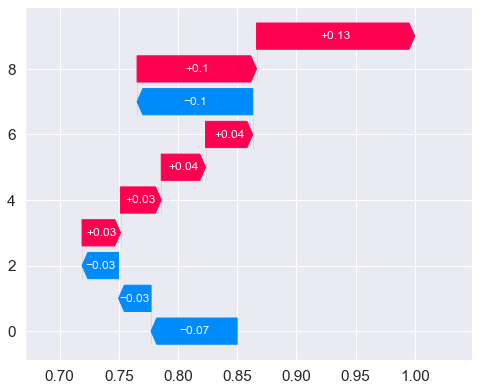

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [42]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\ussrey\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\ussrey\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\ussrey\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\ussrey\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [43]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Ussrey Test Organism')]

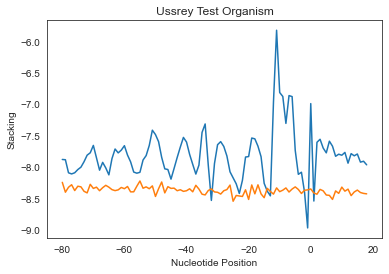

In [44]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Ussrey Test Organism')

## Test Labels

In [45]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [46]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [47]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8292207792207792


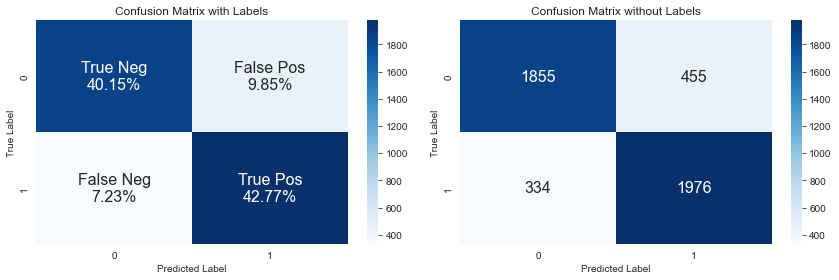

In [48]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [50]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.854978354978355, Precision: 0.8504273504273504, Recall: 0.8614718614718615, F1 Score: 0.8559139784946238, MCC: 0.7100165890703792, Specificity: 0.8484848484848485
Fold 2/10
 Accuracy: 0.8203463203463204, Precision: 0.7936507936507936, Recall: 0.8658008658008658, F1 Score: 0.8281573498964803, MCC: 0.643356654847338, Specificity: 0.7748917748917749
Fold 3/10
 Accuracy: 0.7922077922077922, Precision: 0.7824267782426778, Recall: 0.8095238095238095, F1 Score: 0.7957446808510639, MCC: 0.5847663675338707, Specificity: 0.7748917748917749
Fold 4/10
 Accuracy: 0.8333333333333334, Precision: 0.8181818181818182, Recall: 0.8571428571428571, F1 Score: 0.8372093023255814, MCC: 0.6674238124719146, Specificity: 0.8095238095238095
Fold 5/10
 Accuracy: 0.8333333333333334, Precision: 0.808, Recall: 0.8744588744588745, F1 Score: 0.8399168399168399, MCC: 0.6689332538551268, Specificity: 0.7922077922077922
Fold 6/10
 Accuracy: 0.8398268398268398, Precision: 0.8284518828451883, Recall: 

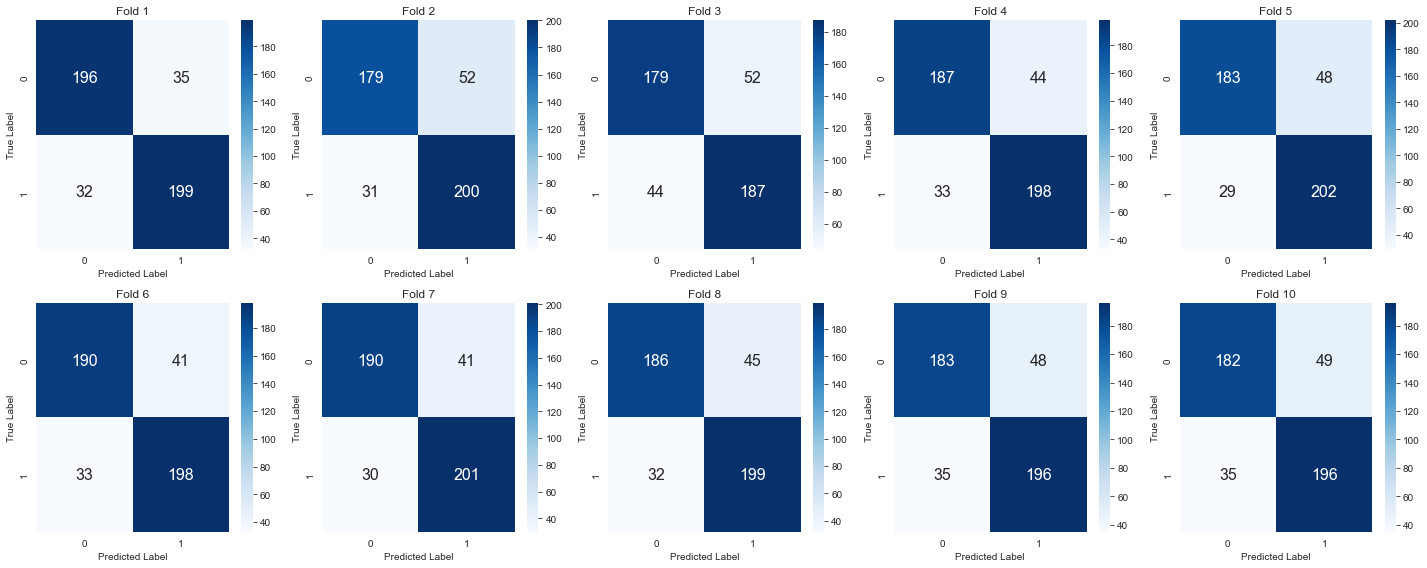

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [52]:
test_accuracy

[0.854978354978355,
 0.8203463203463204,
 0.7922077922077922,
 0.8333333333333334,
 0.8333333333333334,
 0.8398268398268398,
 0.8463203463203464,
 0.8333333333333334,
 0.8203463203463204,
 0.8181818181818182]

In [53]:
test_precision

[0.8504273504273504,
 0.7936507936507936,
 0.7824267782426778,
 0.8181818181818182,
 0.808,
 0.8284518828451883,
 0.8305785123966942,
 0.8155737704918032,
 0.8032786885245902,
 0.8]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [54]:
test_recall

[0.8614718614718615,
 0.8658008658008658,
 0.8095238095238095,
 0.8571428571428571,
 0.8744588744588745,
 0.8571428571428571,
 0.8701298701298701,
 0.8614718614718615,
 0.8484848484848485,
 0.8484848484848485]

In [55]:
test_specificity

[0.8484848484848485,
 0.7748917748917749,
 0.7748917748917749,
 0.8095238095238095,
 0.7922077922077922,
 0.8225108225108225,
 0.8225108225108225,
 0.8051948051948052,
 0.7922077922077922,
 0.7878787878787878]

In [56]:
test_f1_score

[0.8559139784946238,
 0.8281573498964803,
 0.7957446808510639,
 0.8372093023255814,
 0.8399168399168399,
 0.8425531914893617,
 0.8498942917547568,
 0.8378947368421054,
 0.8252631578947369,
 0.823529411764706]

In [57]:
test_mcc

[0.7100165890703792,
 0.643356654847338,
 0.5847663675338707,
 0.6674238124719146,
 0.6689332538551268,
 0.6800616274282792,
 0.693427337633158,
 0.6677248832995594,
 0.64170962810607,
 0.6375355777548621]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [58]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense ussrey promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-3.82,-6.78,-8.26,-9.81,-6.57,-5.37,-9.81,-6.78,-5.37,-5.37,...,-8.26,-6.57,-5.37,-5.37,-5.37,-6.78,-9.81,-5.37,-6.78,1
1,-9.81,-5.37,-6.78,-14.59,-9.69,-9.81,-6.57,-3.82,-5.37,-6.78,...,-5.37,-6.78,-14.59,-6.57,-6.57,-9.81,-8.26,-6.57,-5.37,1
2,-5.37,-9.81,-6.57,-6.57,-6.57,-9.81,-6.57,-3.82,-6.57,-3.82,...,-6.78,-14.59,-6.78,-9.81,-9.69,-10.51,-3.82,-5.37,-5.37,1
3,-9.81,-6.78,-3.82,-6.78,-9.81,-5.37,-6.78,-14.59,-6.78,-6.57,...,-6.57,-8.26,-9.81,-6.78,-9.81,-5.37,-5.37,-6.57,-6.57,1
4,-6.78,-8.26,-10.51,-3.82,-5.37,-5.37,-6.57,-3.82,-10.51,-8.26,...,-6.57,-6.78,-8.26,-14.59,-8.26,-8.26,-6.78,-9.81,-6.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-9.69,-10.51,-5.37,-5.37,-9.81,-8.26,-8.26,-8.26,-6.78,-5.37,...,-5.37,-9.81,-6.57,-6.57,-9.81,-9.69,-10.51,-9.81,-8.26,0
12164,-5.37,-9.81,-6.78,-5.37,-9.81,-9.69,-8.26,-10.51,-6.57,-14.59,...,-10.51,-8.26,-9.69,-8.26,-9.81,-6.78,-14.59,-9.69,-9.81,0
12165,-6.78,-6.57,-9.81,-6.57,-6.57,-8.26,-8.26,-8.26,-9.81,-6.78,...,-10.51,-6.78,-3.82,-5.37,-10.51,-6.57,-6.78,-14.59,-8.26,0
12166,-5.37,-6.78,-9.81,-6.57,-5.37,-6.57,-14.59,-9.69,-8.26,-8.26,...,-8.26,-8.26,-9.81,-10.51,-6.78,-5.37,-5.37,-3.82,-6.78,0


In [59]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [60]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.7304847986852917, Precision: 0.7322314049586777, Recall: 0.7274220032840722, F1 Score: 0.729818780889621, MCC: 0.46098210481764473, Specificity: 0.7878787878787878
Fold 2/10
 Accuracy: 0.7304847986852917, Precision: 0.7198748043818466, Recall: 0.7553366174055829, F1 Score: 0.7371794871794871, MCC: 0.46150866511827027, Specificity: 0.7335526315789473
Fold 3/10
 Accuracy: 0.7362366474938373, Precision: 0.7345276872964169, Recall: 0.7405582922824302, F1 Score: 0.7375306623058054, MCC: 0.47248532814656136, Specificity: 0.7055921052631579
Fold 4/10
 Accuracy: 0.7493837304847987, Precision: 0.7382445141065831, Recall: 0.7733990147783252, F1 Score: 0.7554129911788293, MCC: 0.49931490828625114, Specificity: 0.7319078947368421
Fold 5/10
 Accuracy: 0.7493837304847987, Precision: 0.7431781701444623, Recall: 0.7615131578947368, F1 Score: 0.752233956133225, MCC: 0.4989288819100912, Specificity: 0.725328947368421
Fold 6/10
 Accuracy: 0.7321281840591619, Precision: 0.7136363636

In [61]:
antisense_accuracy

[0.7304847986852917,
 0.7304847986852917,
 0.7362366474938373,
 0.7493837304847987,
 0.7493837304847987,
 0.7321281840591619,
 0.7551355792933443,
 0.7321281840591619,
 0.7327302631578947,
 0.7425986842105263]

In [62]:
antisense_precision

[0.7322314049586777,
 0.7198748043818466,
 0.7345276872964169,
 0.7382445141065831,
 0.7431781701444623,
 0.7136363636363636,
 0.7491961414790996,
 0.7210031347962382,
 0.7214397496087637,
 0.7352472089314195]

In [63]:
antisense_recall

[0.7274220032840722,
 0.7553366174055829,
 0.7405582922824302,
 0.7733990147783252,
 0.7615131578947368,
 0.774671052631579,
 0.7664473684210527,
 0.756578947368421,
 0.7582236842105263,
 0.7582236842105263]

In [64]:
antisense_specificity

[0.7878787878787878,
 0.7335526315789473,
 0.7055921052631579,
 0.7319078947368421,
 0.725328947368421,
 0.7372742200328407,
 0.6896551724137931,
 0.7438423645320197,
 0.7077175697865353,
 0.7072368421052632]

In [65]:
antisense_f1_score

[0.729818780889621,
 0.7371794871794871,
 0.7375306623058054,
 0.7554129911788293,
 0.752233956133225,
 0.7429022082018927,
 0.7577235772357724,
 0.738362760834671,
 0.7393744987971131,
 0.7465587044534413]

In [66]:
antisense_mcc

[0.46098210481764473,
 0.46150866511827027,
 0.47248532814656136,
 0.49931490828625114,
 0.4989288819100912,
 0.46599803331846495,
 0.5104151907013844,
 0.4648429413962535,
 0.46606672761550544,
 0.4854344548600345]

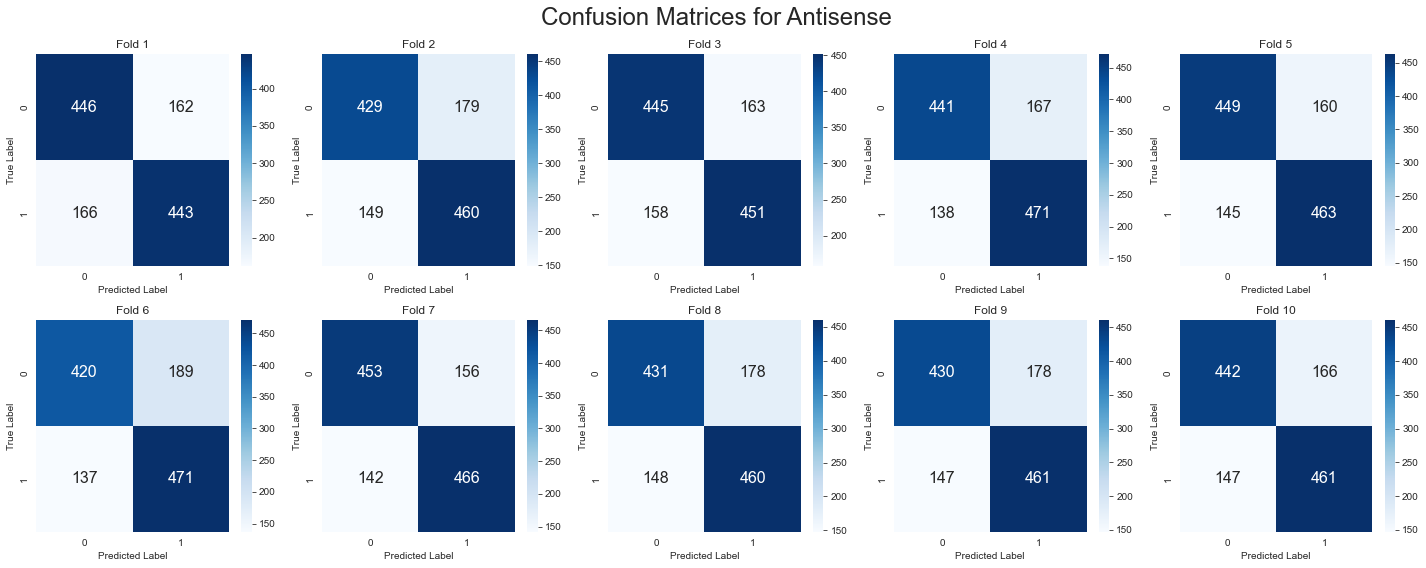

In [67]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [69]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced ussrey promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-6.78,-9.81,-9.69,-10.51,-3.82,-10.51,-9.69,-8.26,-8.26,-9.81,...,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-6.57,-9.81,-6.57,1
1,-6.57,-9.81,-6.57,-5.37,-5.37,-6.57,-5.37,-5.37,-3.82,-10.51,...,-6.57,-6.78,-14.59,-6.78,-5.37,-3.82,-6.57,-6.57,-14.59,1
2,-8.26,-8.26,-14.59,-8.26,-6.57,-6.57,-6.57,-14.59,-6.57,-6.78,...,-6.78,-14.59,-6.57,-5.37,-6.57,-5.37,-6.57,-14.59,-6.78,1
3,-10.51,-6.57,-5.37,-10.51,-6.78,-6.57,-9.81,-6.57,-5.37,-3.82,...,-5.37,-5.37,-10.51,-9.69,-9.81,-5.37,-5.37,-6.57,-9.81,1
4,-6.78,-9.81,-6.78,-5.37,-5.37,-3.82,-5.37,-5.37,-6.57,-9.81,...,-10.51,-6.57,-5.37,-6.78,-9.81,-5.37,-5.37,-5.37,-6.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-8.26,-14.59,-8.26,-8.26,-6.57,-10.51,-9.69,-8.26,-14.59,-9.69,...,-6.57,-5.37,-10.51,-6.78,-9.81,-8.26,-8.26,-9.69,-8.26,0
12126,-8.26,-9.69,-9.81,-10.51,-9.69,-14.59,-6.57,-5.37,-6.78,-14.59,...,-8.26,-14.59,-9.69,-9.81,-5.37,-10.51,-8.26,-9.69,-14.59,0
12127,-5.37,-6.78,-9.81,-5.37,-6.78,-9.81,-10.51,-8.26,-9.69,-9.81,...,-6.57,-10.51,-9.69,-14.59,-8.26,-6.57,-10.51,-8.26,-6.57,0
12128,-14.59,-8.26,-9.69,-9.81,-5.37,-6.78,-9.81,-10.51,-8.26,-6.57,...,-14.59,-9.69,-8.26,-9.81,-6.57,-9.81,-9.69,-8.26,-14.59,0


In [70]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [71]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.7271228359439407, Precision: 0.7395833333333334, Recall: 0.7018121911037891, F1 Score: 0.7202028740490279, MCC: 0.4548628081182733, Specificity: 0.7269736842105263
Fold 2/10
 Accuracy: 0.718878812860676, Precision: 0.7309027777777778, Recall: 0.6935749588138386, F1 Score: 0.7117497886728656, MCC: 0.4383538680967461, Specificity: 0.7524752475247525
Fold 3/10
 Accuracy: 0.718878812860676, Precision: 0.7261904761904762, Recall: 0.7034596375617792, F1 Score: 0.7146443514644352, MCC: 0.4379867256776242, Specificity: 0.7442244224422442
Fold 4/10
 Accuracy: 0.72959604286892, Precision: 0.7451669595782073, Recall: 0.6985172981878089, F1 Score: 0.7210884353741497, MCC: 0.4601235763251989, Specificity: 0.7343234323432343
Fold 5/10
 Accuracy: 0.6941467436108821, Precision: 0.6947194719471947, Recall: 0.6935749588138386, F1 Score: 0.6941467436108821, MCC: 0.38829443076103326, Specificity: 0.7607260726072608
Fold 6/10
 Accuracy: 0.7279472382522671, Precision: 0.73154362416107

In [72]:
internal_accuracy

[0.7271228359439407,
 0.718878812860676,
 0.718878812860676,
 0.72959604286892,
 0.6941467436108821,
 0.7279472382522671,
 0.7353668590272052,
 0.7089859851607585,
 0.7164056059356966,
 0.7304204451772465]

In [73]:
internal_precision

[0.7395833333333334,
 0.7309027777777778,
 0.7261904761904762,
 0.7451669595782073,
 0.6947194719471947,
 0.7315436241610739,
 0.7452667814113597,
 0.7090909090909091,
 0.7220338983050848,
 0.7469026548672566]

In [74]:
internal_recall

[0.7018121911037891,
 0.6935749588138386,
 0.7034596375617792,
 0.6985172981878089,
 0.6935749588138386,
 0.7194719471947195,
 0.7145214521452146,
 0.7079207920792079,
 0.7029702970297029,
 0.6963696369636964]

In [75]:
internal_specificity

[0.7269736842105263,
 0.7524752475247525,
 0.7442244224422442,
 0.7343234323432343,
 0.7607260726072608,
 0.6947194719471947,
 0.7364085667215815,
 0.7561779242174629,
 0.7100494233937397,
 0.729818780889621]

In [76]:
internal_f1_score

[0.7202028740490279,
 0.7117497886728656,
 0.7146443514644352,
 0.7210884353741497,
 0.6941467436108821,
 0.7254575707154742,
 0.7295703454085931,
 0.708505367464905,
 0.7123745819397992,
 0.7207514944491886]

In [77]:
internal_mcc

[0.4548628081182733,
 0.4383538680967461,
 0.4379867256776242,
 0.4601235763251989,
 0.38829443076103326,
 0.4559486927897376,
 0.47111580607087084,
 0.417971351754068,
 0.4329491792053998,
 0.4618671443444025]

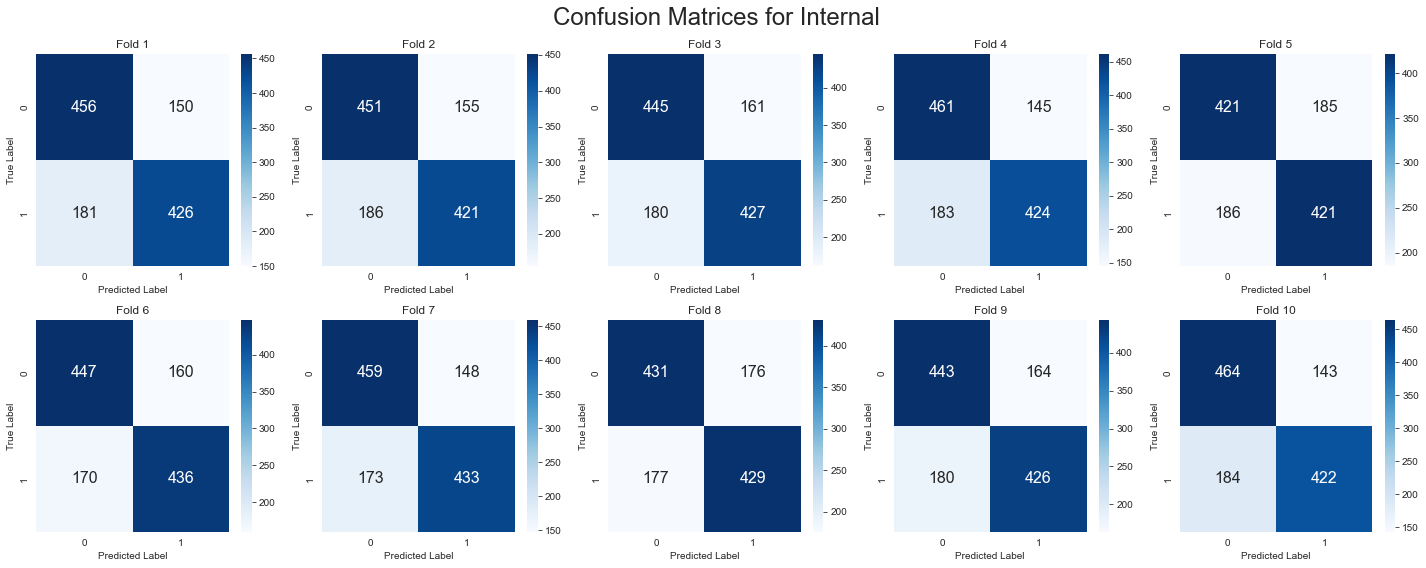

In [78]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
